PP-Chain sensitivity:  3.901742887374687
CNO-Cycle sensitivity:  19.915506671564547


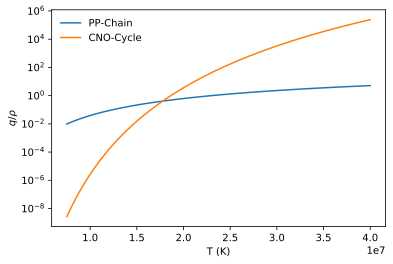

In [1]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def q_pp(X, Z, T):
    'PP-chain energy generation rate'
    T9 = T/1.e9
    return 2.4e4*X**2*np.exp(-3.380/T9**(1./3.))/T9**(2./3.)

def q_cno(X, Z, T):
    'CNO-cycle energy generation rate'
    T9 = T/1.e9
    return 4.4e25*X*Z*np.exp(-15.228/T9**(1./3.))/T9**(2./3.)

def make_plot():
    'Set up graph for plotting'
    T = np.linspace(7.5e6, 4.e7, 100)
    X = 0.7
    Z = 0.02
    plt.plot(T, q_pp(X, Z, T), label='PP-Chain')
    plt.plot(T, q_cno(X, Z, T), label='CNO-Cycle')
    plt.legend(frameon=False)
    plt.xlabel('T (K)')
    plt.ylabel(r'$q/\rho$')
    ax = plt.gca()
    ax.set_yscale('log')

def T_sensitivity(Q, T0, X=0.7, Z=0.02):
    'Compute the temperature sensitivity around T = T0'
    t = 1.e-8
    q1 = Q(X, Z, T0)
    q2 = Q(X, Z, T0*(1+t))
    dlogq_dlogT = (T0/q1)*(q2-q1)/(T0*t)
    return dlogq_dlogT

if __name__ == '__main__':
    make_plot()
    print('PP-Chain sensitivity: ', T_sensitivity(q_pp, 1.5e7))
    print('CNO-Cycle sensitivity: ', T_sensitivity(q_cno, 1.5e7))